# Principal Component Analysis

In [20]:
import numpy as np                       # mathematical methods
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
from sklearn.decomposition import PCA
import pandas as pd
%matplotlib inline

## PCA on artificial dataset by hand and using sklearn function

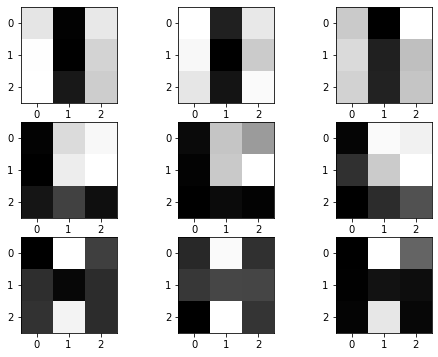

In [2]:
# create dataset from three images with random noise
np.random.seed(42)
vshape = (3, 3)
vn = vshape[0]*vshape[1]
# create 10 images for each category
v = np.zeros((vn, 30))
# category 1: 'I'
for i in range(0, 10):
    v[:, i] = 192-np.array([0, 1, 0, 0, 1, 0, 0, 1, 0])*128+15*stats.norm.rvs(size=vn)
# category 2: 'L'
for i in range(10, 20):
    v[:, i] = 192-np.array([1, 0, 0, 1, 0, 0, 1, 1, 1])*128+15*stats.norm.rvs(size=vn)
# category 3: 'H'
for i in range(20, 30):
    v[:, i] = 192-np.array([1, 0, 1, 1, 1, 1, 1, 0, 1])*128+15*stats.norm.rvs(size=vn)
fig = plt.figure(figsize=(8,6))
examples = (0,1,2,11,12,13,21,22,23)
for i, example in enumerate(examples):
    fig.add_subplot(3, 3, i+1)
    plt.imshow(v[:,example].reshape(vshape), cmap=plt.cm.gray, interpolation='nearest'); 

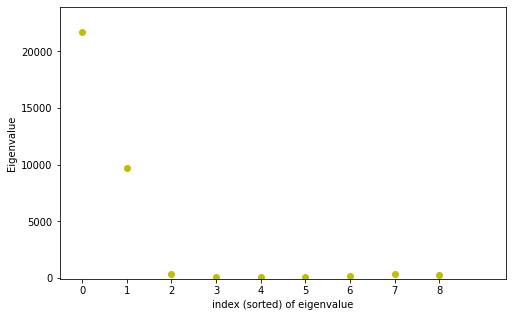

In [4]:
# PCA by hand
# subtract mean
vmean = v.mean(axis=1)
a = (v.T - vmean).T
# build covariance matrix
C = 1./a.shape[1] * np.dot(a, a.T)
# diagonalize matrix
EW, EV = np.linalg.eig(C)
plt.figure(figsize=(8,5))
plt.plot(EW, 'yo')
plt.xlabel('index (sorted) of eigenvalue')
plt.ylabel('Eigenvalue')
plt.axis((-.5, 9.5, -min(EW), 1.1*max(EW)))
plt.xticks((np.arange(9)))
liste = [(np.abs(EW[i]), EV[:, i]) for i in range(EW.shape[0])]
# sort eigenvalues in descending order
sorted(liste,reverse=True)
# first two seem to hold nearly complete variance, so only keep them
h = 2
# projection matrix
W = np.asarray([liste[i][1] for i in range(h)])

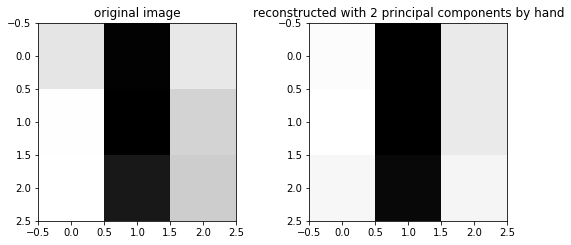

In [14]:
# project first image to lower dimensional space and back to compare with original image
vX0 = v[:,0]
# center it
aX0 = vX0 - vmean
# average as starting point
v_0 = vmean.copy()
# iterate thorugh sorted eigenvectors
for w in W:
    # accumulate re-projection of principal component
    v_0 += np.dot(w, aX0) * w
fig = plt.figure(figsize=(8,5))
fig.add_subplot(1, 2, 1)
image = vX0.reshape(vshape)
plt.title('original image')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
fig.add_subplot(1, 2, 2)
image = v_0.reshape(vshape)
plt.title('reconstructed with {} principal components by hand'.format(h))
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
plt.tight_layout()

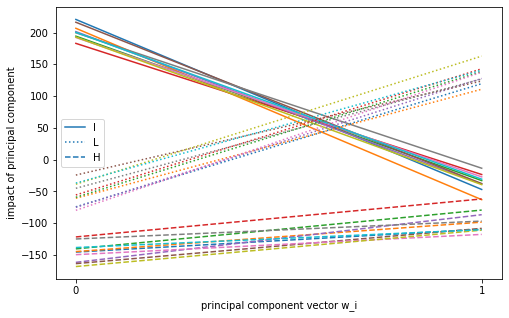

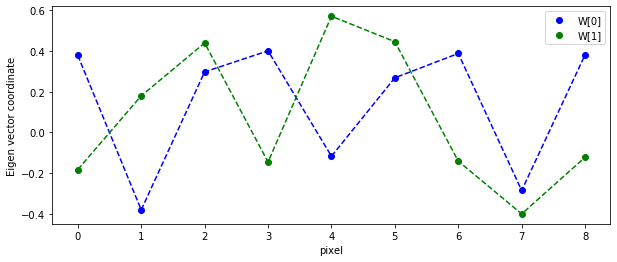

In [7]:
# project all data
Alpha = W.dot(a) 
# 
plt.figure(figsize=(8,5))
plt.plot(Alpha[:, 0:10], ls='-',  label='I')
plt.plot(Alpha[:,10:20], ls=':',  label='L')
plt.plot(Alpha[:,20:30], ls='--', label='H')
plt.xlabel('principal component vector w_i')
plt.ylabel('impact of principal component')
plt.xticks(np.arange(Alpha.shape[0]))
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::10]
labels = labels[::10]
plt.legend(handles,labels)
plt.show();

fig = plt.subplots(figsize=(10,4))
plt.plot(W[0], 'bo', label='W[0]')
plt.plot(W[1], 'go', label='W[1]')
plt.plot(W[0], 'b--')
plt.plot(W[1], 'g--')
plt.xlabel('pixel')
plt.ylabel('Eigen vector coordinate')
plt.legend();

In [8]:
# same thing using sklearn function
X =  np.array(v.T)                 # only optional: -vmean
pca = PCA(n_components=2)          # set up the frame; limit number of components
pca.fit(X)                         # perform the fit to the data
W = pca.components_

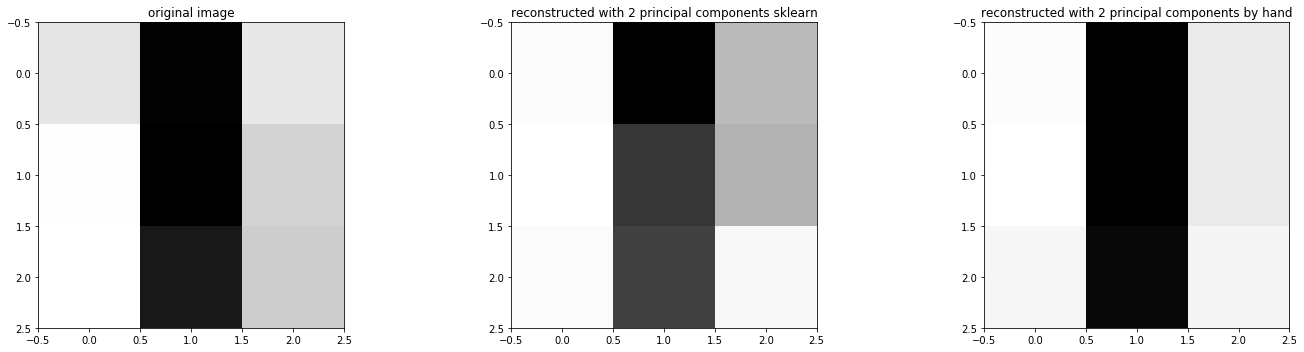

In [15]:
# project first image and compare reconstructed one to original
vx0 = np.expand_dims(v[:,0],axis=0)
pca_x0 = pca.transform(vx0)
v0 = pca_x0 @ pca.components_
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1, 3, 1)
image = vX0.reshape(vshape)
plt.title('original image')
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
fig.add_subplot(1, 3, 2)
image = v0.reshape(vshape)
plt.title('reconstructed with {} principal components sklearn'.format(h))
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
fig.add_subplot(1, 3, 3)
image = v_0.reshape(vshape)
plt.title('reconstructed with {} principal components by hand'.format(h))
plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
plt.tight_layout();

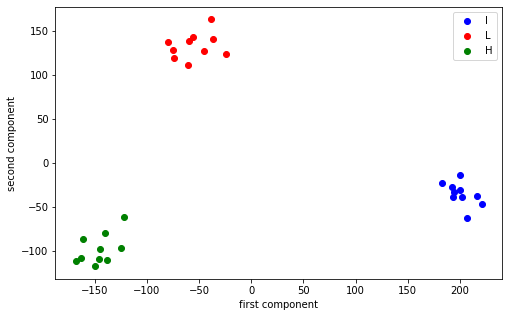

In [17]:
# project all data
pca_v = pca.transform(v.T)
# check if classification based on two PCs works -> clusters well separated in two dimensional subspace
plt.figure(figsize=(8,5))
plt.plot(pca_v[0:10, 0], pca_v[0:10, 1], 'bo', label='I')
plt.plot(pca_v[10:20,0], pca_v[10:20,1], 'ro', label='L')
plt.plot(pca_v[20:30,0], pca_v[20:30,1], 'go', label='H')
plt.xlabel('first component')
plt.ylabel('second component')
plt.legend()
plt.show()
mean_I = (pca_v[0:10,0].mean(),pca_v[0:10,1].mean())
mean_L = (pca_v[10:20,0].mean(),pca_v[10:20,1].mean())
mean_H = (pca_v[20:30,0].mean(),pca_v[20:30,1].mean());

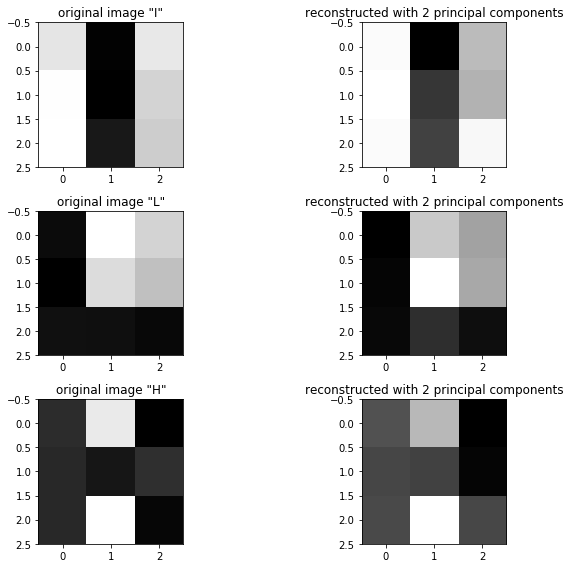

In [18]:
# project original/non-noisy images and transform back to check if well reconstructed
I0 = v[:,0]
L0 = v[:,10]
H0 = v[:,20]
letter_id = ['I','L','H']
letters = np.stack([I0,L0,H0],axis=0)
back_proj_letters = pca.transform(letters) @ pca.components_

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(10,8))
for l in range(len(letters)):
    image = letters[l].reshape(vshape)
    ax[l,0].set_title('original image "{}"'.format(letter_id[l]))
    ax[l,0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    image = back_proj_letters[l].reshape(vshape)
    ax[l,1].set_title('reconstructed with {} principal components'.format(h))
    ax[l,1].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
plt.tight_layout();

## PCA on real dataset and limitations

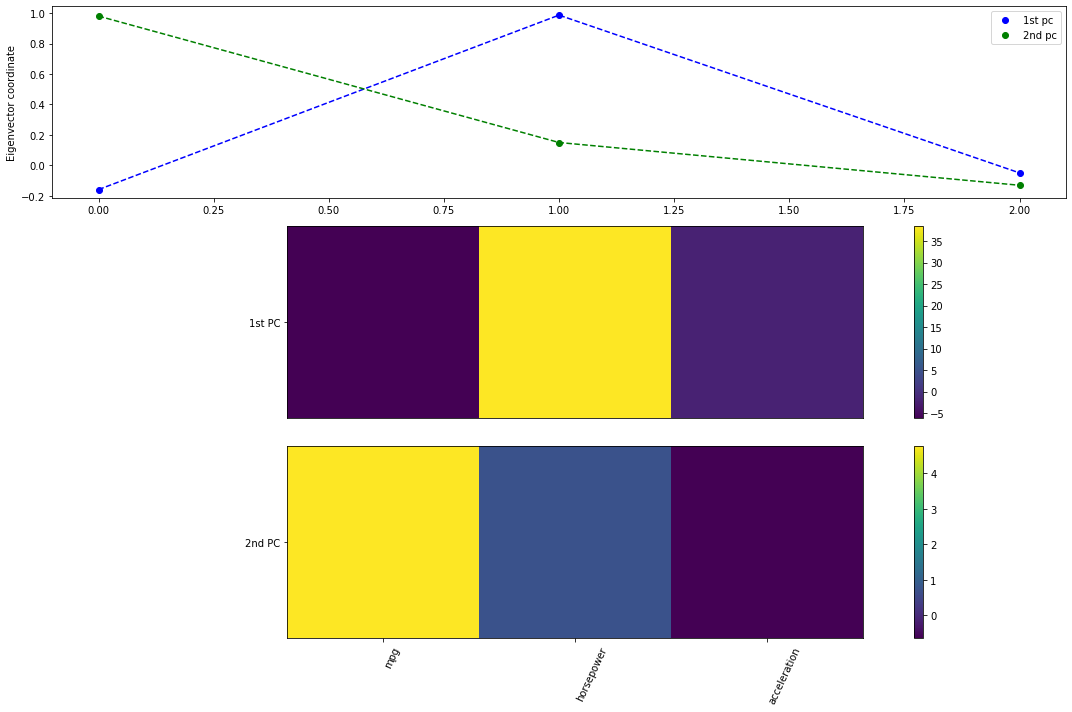

In [38]:
# load dataset
cars_data = pd.read_csv('data/cars_multi.csv',sep=',')
cars_data = cars_data.dropna()
# only use these three attributes for simplicity
variables = ['mpg','horsepower','acceleration']
cars = cars_data[variables].values
cars = (cars - cars.mean(axis=0))
# do PCA and keep only 2 PCs
h = 2
pca = PCA(n_components=h)
pca.fit(cars)
W = pca.components_
EW = pca.explained_variance_
# explore meaning of first PCs
fig, axes = plt.subplots(figsize=(15,10),nrows=3,ncols=1)
axes[0].plot(W[0], 'bo', label='1st pc')
axes[0].plot(W[1], 'go', label='2nd pc')
axes[0].plot(W[0], 'b--')
axes[0].plot(W[1], 'g--')
axes[0].set_ylabel('Eigenvector coordinate')
axes[0].set_xticks(np.arange(len(variables)),variables)
axes[0].legend()

pc1_im = axes[1].imshow(np.expand_dims(np.sqrt(EW[0]) * W[0],axis=0),cmap = 'viridis')
axes[1].set_yticks(np.arange(1))
axes[1].set_yticklabels(['1st PC'])
axes[1].set_xticks([])
plt.colorbar(pc1_im,ax=axes[1])
pc2_im = axes[2].imshow(np.expand_dims(np.sqrt(EW[1])*W[1],axis=0),cmap='viridis')
axes[2].set_yticks(np.arange(1))
axes[2].set_yticklabels(['2nd PC'])
axes[2].set_xticks(range(len(variables)))
axes[2].set_xticklabels(variables, fontsize=10, rotation=65,ha='left')
plt.colorbar(pc2_im,ax=axes[2])
plt.tight_layout()
plt.show();

In [39]:
# are there outliers? Which car is being reconstructed the worst?
# project cars to lower dim space and back in order to compare them with the original data
cars_reprojected = pca.transform(cars) @ W
residuals = cars - cars_reprojected
mse = np.sum(residuals**2, axis = 1)
worst_id = np.argmax(mse)
worst_name = cars_data.iloc[worst_id]['car_name']
worst_data = cars[worst_id]
worst_repr = cars_reprojected[worst_id]
print('The car {} is being the worst reconstructed.'.format(worst_name))
print('Original data {}:\n{}'.format(variables,worst_data))
print('Reconstructed data {}:\n{}'.format(variables,worst_repr))

The car vw pickup is being the worst reconstructed.
Original data ['mpg', 'horsepower', 'acceleration']:
[ 20.55408163 -52.46938776   9.05867347]
Reconstructed data ['mpg', 'horsepower', 'acceleration']:
[ 19.60320187 -53.00616308   1.25782661]


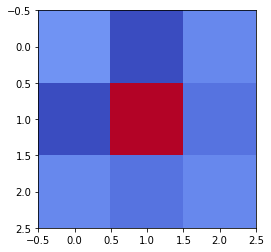

In [40]:
# is PCA meaningful in this setting?
# PCA works best for gaussian data and if there is a linear relationship
# cars seem to vary a lot in horsepower but the coefficients for other attributes are about the same
C = 1./cars.shape[0] * np.dot(cars.T, cars)
plt.imshow(C, cmap=plt.cm.coolwarm, interpolation='nearest');

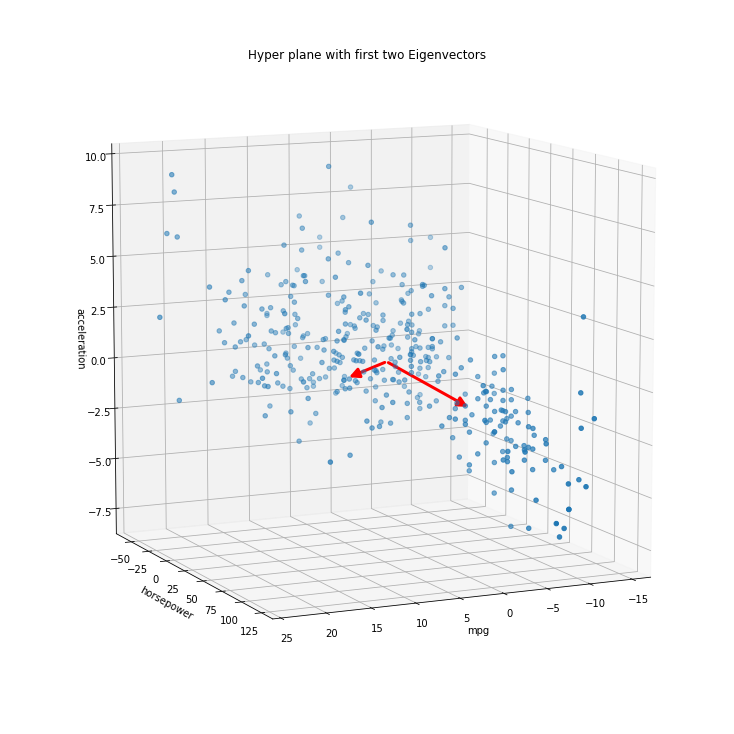

In [41]:
# 3D image of data with first two PCs
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(cars[:,0],cars[:,1],cars[:,2],'bo')
ax.view_init(elev=20, azim=60)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_zlabel(variables[2])

# choose viewpoint
ax.view_init(elev=10, azim=65)
vm = np.array(cars.mean(axis=0))
arr = Arrow3D([0, vm[0]], [0, vm[1]], [0, vm[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
ax.add_artist(arr) 
w = vm + np.sqrt(EW[0])*W[0]           # first eigenvector + mean
# vm = np.array([0, 0, 0])
arr = Arrow3D([vm[0], w[0]], [vm[1], w[1]], [vm[2], w[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(arr)                       # 
w = vm + np.sqrt(EW[1])*W[1]           # second eigenvector + mean
arr = Arrow3D([vm[0], w[0]], [vm[1], w[1]], [vm[2], w[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(arr)
plt.title('Hyper plane with first two Eigenvectors')
plt.show()